In [13]:
%pip install pandas matplotlib -q
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import os


[notice] A new release of pip available: 22.2.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
# Park id for Chessington
park_id = 3

# Read into pandas df from sqlite fromm root directory, then date/queue_data.db
# Read the park_info and queue_data tables
conn = sqlite3.connect('../../data/queue_data.db')
park_info = pd.read_sql_query(f"SELECT * FROM park_info WHERE park_id = {park_id}", conn)
queue_data = pd.read_sql_query("SELECT * FROM queue_data", conn)
conn.close()

# Convert the date column to datetime format
queue_data['date'] = pd.to_datetime(queue_data['date'], format='%Y/%m/%d')
# Convert the time column to timedelta format
queue_data['time_of_day'] = pd.to_datetime(queue_data['time_of_day'], format='%H:%M').dt.time
# Convert the queue_time column to numeric format
queue_data['queue_time'] = pd.to_numeric(queue_data['queue_time'], errors='coerce')
# Convert the is_closed numeric format to boolean
queue_data['is_closed'] = queue_data['is_closed'].astype(bool)

# Drop id columns
queue_data.drop(columns=['id'], inplace=True)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    # Display the park_info DataFrame
    print("Park Info:")
    display(park_info)
    
# Display the queue_data DataFrame
print("\nQueue Data:")
display(queue_data)

Park Info:


,ride_id,park_id,ride_name
0,4574,3,Adventure Tree Carousel
1,59,3,AMAZU: Treetop Adventure
2,62,3,Canopy Capers
3,8691,3,Croc Drop
4,65,3,Dragon's Fury
5,67,3,Elmer's Flying Jumbos
6,87,3,Griffin's Galleon
7,70,3,Jungle Bus
8,7336,3,Jungle Rangers
9,71,3,KOBRA



Queue Data:


,date,ride_id,time_of_day,queue_time,is_closed
0,2021-04-12,4614,10:00:00,0,True
1,2021-04-12,4614,10:15:00,0,True
2,2021-04-12,4614,10:30:00,0,True
3,2021-04-12,4614,10:45:00,0,True
4,2021-04-12,4614,11:00:00,0,True
...,...,...,...,...,...
2543368,2025-08-05,84,16:00:00,50,False
2543369,2025-08-05,84,16:15:00,30,False
2543370,2025-08-05,84,16:30:00,30,False
2543371,2025-08-05,84,16:45:00,30,False


In [15]:
# List of main rides
main_attraction_ids = ['65', '74', '64', '83', '84', '4535', '85', '11814']

# Filter the queue_data DataFrame for the main coasters using the id in the park_info DataFrame
queue_data_filtered = queue_data[queue_data['ride_id'].isin(main_attraction_ids)]

# Filter to only show times from 10:00 to 17:00
queue_data_filtered = queue_data_filtered[(queue_data_filtered['time_of_day'] >= pd.to_datetime('10:00').time()) & 
                                           (queue_data_filtered['time_of_day'] <= pd.to_datetime('17:00').time())]

# Display the filtered DataFrame
display(queue_data_filtered)

,date,ride_id,time_of_day,queue_time,is_closed
1704005,2021-04-12,65,10:00:00,0,False
1704006,2021-04-12,65,10:15:00,0,False
1704007,2021-04-12,65,10:30:00,0,False
1704008,2021-04-12,65,10:45:00,0,False
1704009,2021-04-12,65,11:00:00,0,False
...,...,...,...,...,...
2543368,2025-08-05,84,16:00:00,50,False
2543369,2025-08-05,84,16:15:00,30,False
2543370,2025-08-05,84,16:30:00,30,False
2543371,2025-08-05,84,16:45:00,30,False


In [16]:
# Filter the DataFrame where is_closed is False
open_queue_data = queue_data_filtered[~queue_data_filtered['is_closed']]

# Group by ride_id and time_of_day, then calculate the mean queue_time
average_queue_time = open_queue_data.groupby(['ride_id', 'time_of_day'])['queue_time'].mean().reset_index()

# Rename columns for clarity
average_queue_time.rename(columns={'queue_time': 'average_queue_time'}, inplace=True)

# Display the result
display(average_queue_time)

,ride_id,time_of_day,average_queue_time
0,11814,10:00:00,10.940767
1,11814,10:15:00,20.926518
2,11814,10:30:00,26.880878
3,11814,10:45:00,31.894410
4,11814,11:00:00,33.368580
...,...,...,...
227,85,16:00:00,21.704289
228,85,16:15:00,20.674603
229,85,16:30:00,19.648924
230,85,16:45:00,18.721591


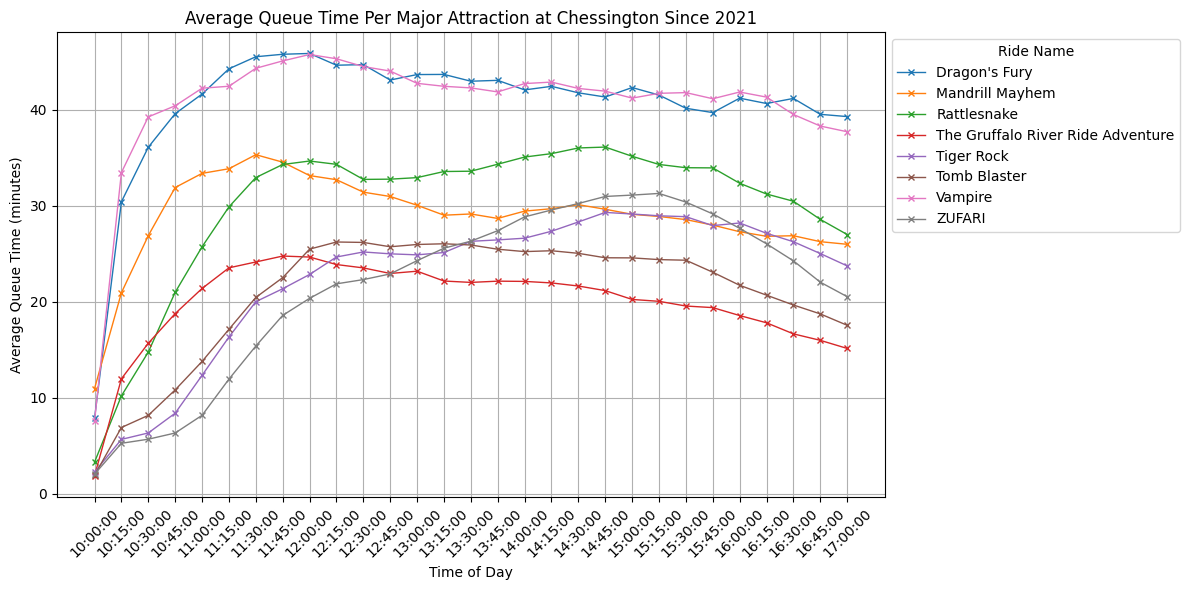

In [17]:
# Rename median_queue_time to average_queue_time
average_queue_time = average_queue_time.merge(park_info[['ride_id', 'ride_name']], on='ride_id', how='left')

# Create a string representation of the time_of_day column for plotting
average_queue_time['time_of_day_str'] = average_queue_time['time_of_day'].astype(str)

# Plot the data
plt.figure(figsize=(12, 6))
for ride_name, group in average_queue_time.groupby('ride_name'):
    plt.plot(group['time_of_day_str'], group['average_queue_time'], marker='x', label=ride_name, linewidth=1, markersize=5)

# Add gridlines
plt.grid(True)

# Add labels and title
plt.xlabel('Time of Day')
plt.ylabel('Average Queue Time (minutes)')
plt.title('Average Queue Time Per Major Attraction at Chessington Since 2021')

# Add legend
plt.legend(title='Ride Name', loc='upper left', bbox_to_anchor=(1, 1))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()

#Mkdir if not exists
if not os.path.exists('figures'):
    os.makedirs('figures')

# Export
plt.savefig('figures/average_queue_time_plot.png', dpi=300, bbox_inches='tight')
plt.show()